## Referências

https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

In [12]:
import numpy as np

import librosa
import librosa.display

%matplotlib inline
import matplotlib.pyplot as plt

import IPython.display as ipd

import sklearn

In [17]:
file_nutcracker = 'librosa/nutcracker.ogg'
file_choice = 'librosa/choice.ogg'
file_trumpet = 'librosa/trumpet.ogg'
file_brahms = 'librosa/brahms.ogg'

In [27]:
# Load an ogg vorbis file
filename = file_trumpet
x, sr = librosa.load(filename)
print(x)
print(sr)

ipd.Audio(x, rate=sr)

[-1.4068224e-03 -4.4607223e-04 -4.1098078e-04 ...  7.9623060e-06
 -3.0417003e-05  1.2765067e-05]
22050


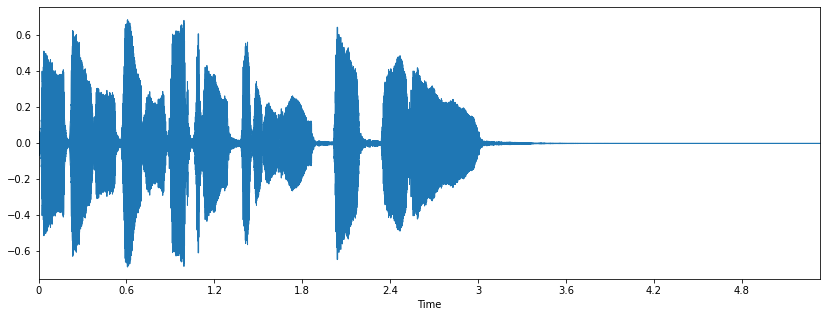

In [28]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

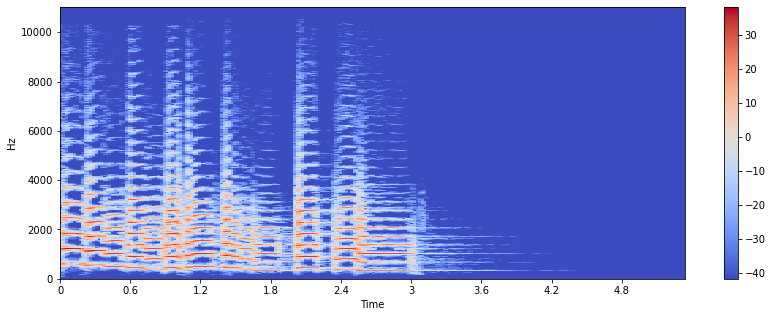

In [29]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

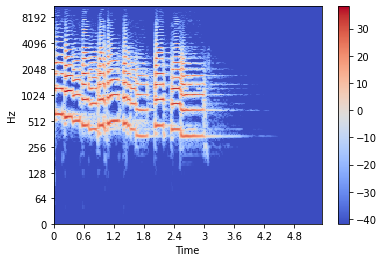

In [30]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
#plt.figure(figsize=(14, 5))
plt.colorbar()

In [31]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(230,)

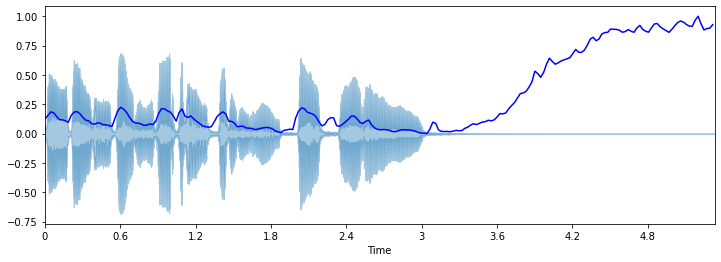

In [32]:
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

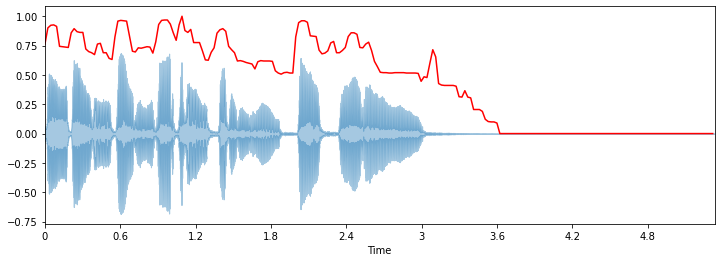

In [33]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

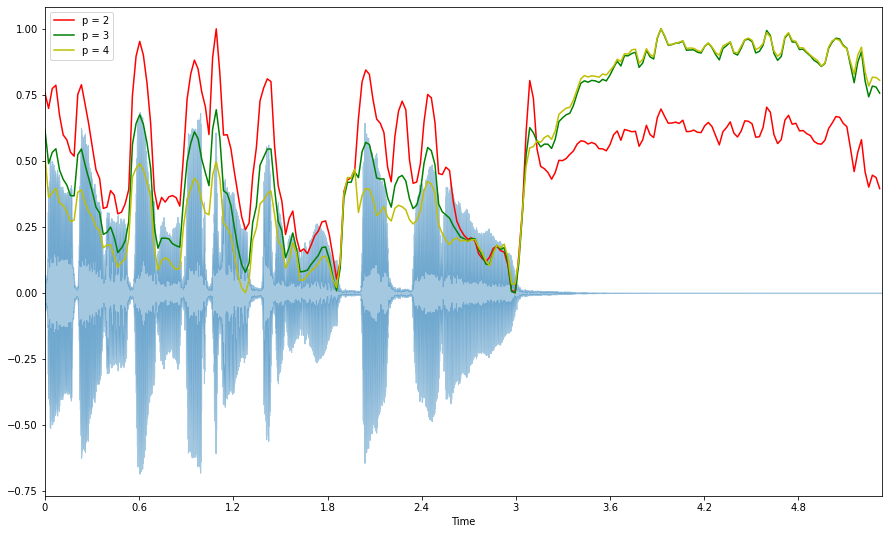

In [34]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]

plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

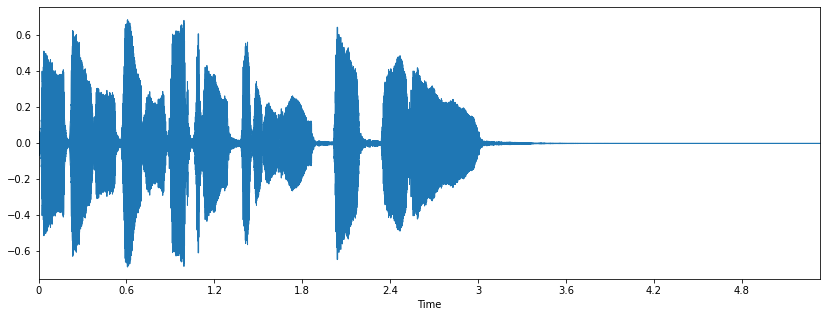

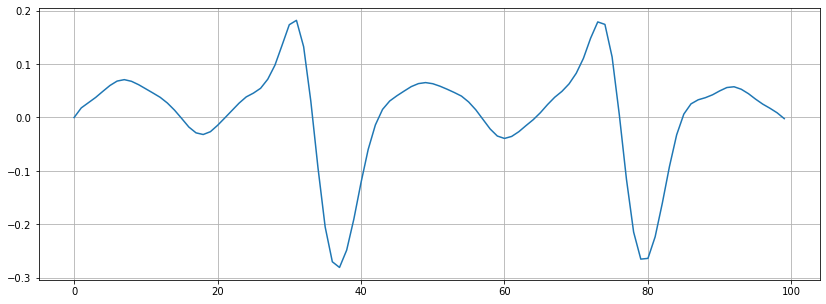

In [35]:
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

# Zooming in
n0 = 9000
n1 = 9100

plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [36]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings)) #16

10


In [38]:
mfccs = librosa.feature.mfcc(x, sr=sr)
mfccs.shape

(20, 230)

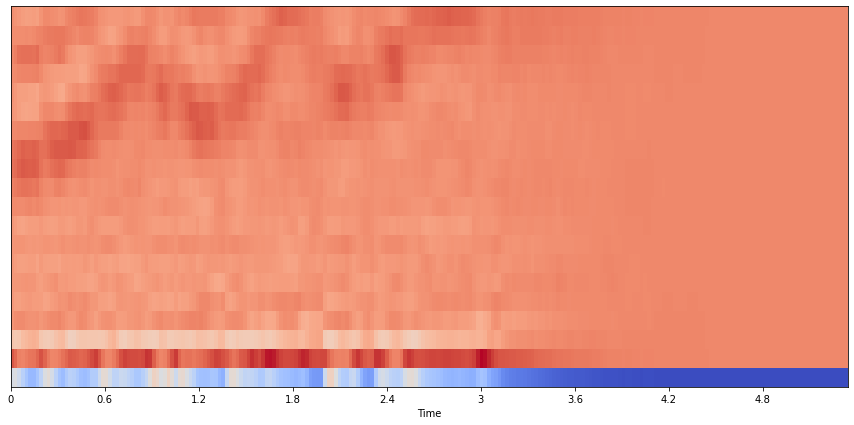

In [39]:
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

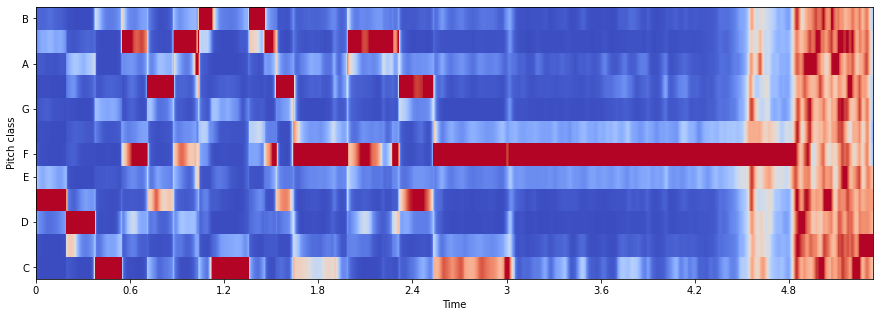

In [42]:
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=128)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=128, cmap='coolwarm')